In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
!ls

steam-200k.csv	steam.ipynb


In [3]:
data = pd.read_csv('steam-200k.csv', header = None, names = ["user_id", "game_title", "behavior", "hours", "ignore"])
data
# note the columns like hours and behaviour

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


count    200000.000000
mean         17.874384
std         138.056952
min           0.100000
25%           1.000000
50%           1.000000
75%           1.300000
max       11754.000000
Name: hours, dtype: float64


<AxesSubplot:>

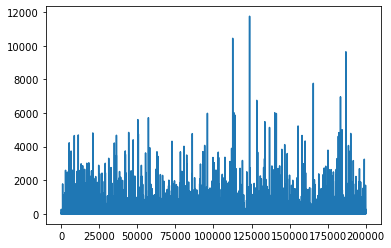

In [4]:
print(data.hours.describe())
data.hours.plot()

In [5]:
data.behavior.value_counts()

purchase    129511
play         70489
Name: behavior, dtype: int64

In [6]:
purchase = data[data.behavior == 'purchase']
play = data[data.behavior == 'play']

In [7]:
purchase

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
2,151603712,Fallout 4,purchase,1.0,0
4,151603712,Spore,purchase,1.0,0
6,151603712,Fallout New Vegas,purchase,1.0,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
...,...,...,...,...,...
199990,128470551,Fallen Earth,purchase,1.0,0
199992,128470551,Magic Duels,purchase,1.0,0
199994,128470551,Titan Souls,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0


In [8]:
purchase[purchase.game_title == 'Grand Theft Auto Vice City']

,user_id,game_title,behavior,hours,ignore
2725,56038151,Grand Theft Auto Vice City,purchase,1.0,0
2726,56038151,Grand Theft Auto Vice City,purchase,1.0,0
3549,148510973,Grand Theft Auto Vice City,purchase,1.0,0
3575,148510973,Grand Theft Auto Vice City,purchase,1.0,0
7433,20200395,Grand Theft Auto Vice City,purchase,1.0,0
...,...,...,...,...,...
194036,20772968,Grand Theft Auto Vice City,purchase,1.0,0
194037,20772968,Grand Theft Auto Vice City,purchase,1.0,0
195822,112845094,Grand Theft Auto Vice City,purchase,1.0,0
195823,112845094,Grand Theft Auto Vice City,purchase,1.0,0


In [9]:
print('# items: ', purchase.game_title.nunique())
print('# users: ', purchase.user_id.nunique())
print('# interactions: ', purchase.shape[0])

# items:  5155
# users:  12393
# interactions:  129511


In [10]:
print('# items: ', play.game_title.nunique())
print('# users: ', play.user_id.nunique())
print('# interactions: ', play.shape[0])

# items:  3600
# users:  11350
# interactions:  70489


In [11]:
print('# items: ', data.game_title.nunique())
print('# users: ', data.user_id.nunique())
print('# interactions: ', data.shape[0])

# items:  5155
# users:  12393
# interactions:  200000


In [12]:
temp = data.user_id.value_counts()
temp[temp >= 20]
# users who played atleast 20 games 

62990992     1573
33865373      949
11403772      906
30246419      901
47457723      855
             ... 
78799565       20
109669093      20
197620904      20
18109027       20
281168230      20
Name: user_id, Length: 1774, dtype: int64

In [19]:
temp = data.groupby('user_id').filter(lambda x: len(x) >= 20)
temp
# dataframe containing interactions of users with atleast 20 rows 

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [20]:
temp.user_id.nunique()
# above code is working fine

1774

In [21]:
temp2 = temp.game_title.value_counts()
data_filtered = temp2[temp2 >= 20].copy()
temp2[temp2 >= 20].sum()
# 134 K interactions with both user and item counts >= 20

134206

In [25]:
data_filtered = temp.groupby('game_title').filter(lambda x: len(x) >= 20)
data_filtered

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199993,128470551,Magic Duels,play,2.2,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [27]:
data_filtered.user_id.value_counts()

62990992     865
11403772     728
49893565     664
47457723     649
33013552     587
            ... 
207248568     10
66438889      10
285869008      9
243053090      5
62985928       4
Name: user_id, Length: 1773, dtype: int64

In [28]:
data

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [35]:
# first filter items then filter users
filter1 = data.groupby('game_title').filter(lambda x: len(x) >= 20).copy()
filter2 = filter1.groupby('user_id').filter(lambda x: len(x) >= 20).copy()
filter3 = filter2.groupby('game_title').filter(lambda x: len(x) >= 20).copy()
filter4 = filter3.groupby('user_id').filter(lambda x: len(x) >= 20).copy()
filter5 = filter4.groupby('game_title').filter(lambda x: len(x) >= 20).copy()
filter6 = filter5.groupby('user_id').filter(lambda x: len(x) >= 20).copy()

In [46]:
filter6

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199993,128470551,Magic Duels,play,2.2,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [48]:
filter6.user_id.value_counts()

62990992     863
11403772     726
49893565     664
47457723     648
33013552     586
            ... 
120514307     20
203968405     20
78799565      20
29052354      20
201713909     20
Name: user_id, Length: 1698, dtype: int64

In [49]:
filter6.game_title.value_counts()

Team Fortress 2                    1860
Counter-Strike Global Offensive    1610
Dota 2                             1496
Left 4 Dead 2                      1249
Unturned                           1181
                                   ... 
Damned                               20
Carrier Command Gaea Mission         20
Wings of Prey                        20
Abyss Odyssey                        20
Ionball 2  Ionstorm                  20
Name: game_title, Length: 1397, dtype: int64

In [53]:
# now "filter6" contains data such that each user and each game have atleast 20 interactions(;)
filter6.to_csv('processed_data.csv', index = False)

In [54]:
df = pd.read_csv('processed_data.csv')
df

,user_id,game_title,behavior,hours,ignore
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
132826,128470551,Magic Duels,play,2.2,0
132827,128470551,Grand Theft Auto Vice City,purchase,1.0,0
132828,128470551,Grand Theft Auto Vice City,play,1.5,0
132829,128470551,RUSH,purchase,1.0,0


In [55]:
print(df.user_id.nunique())
print(df.game_title.nunique())

1698
1397


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.user_id = le.fit_transform(df.user_id)
df.game_title = le.fit_transform(df.game_title)
df

,user_id,game_title,behavior,hours,ignore
0,1199,1170,purchase,1.0,0
1,1199,1170,play,273.0,0
2,1199,453,purchase,1.0,0
3,1199,453,play,87.0,0
4,1199,1069,purchase,1.0,0
...,...,...,...,...,...
132826,1054,684,play,2.2,0
132827,1054,535,purchase,1.0,0
132828,1054,535,play,1.5,0
132829,1054,890,purchase,1.0,0


In [61]:
print(df.user_id.unique())
print(df.game_title.unique())
print(df.user_id.unique().max())
print(df.game_title.unique().max())

[1199  442  378 ... 1028  799 1054]
[1170  453 1069 ...  983  439  656]
1697
1396


In [63]:
df = df[['user_id', 'game_title']]
df.columns = ['user', 'game']
df.to_csv('steam_data.csv', index = False)
df

,user,game
0,1199,1170
1,1199,1170
2,1199,453
3,1199,453
4,1199,1069
...,...,...
132826,1054,684
132827,1054,535
132828,1054,535
132829,1054,890


In [64]:
# final processed recommendation data containing only users and games with certain thresholds
steam = pd.read_csv('steam_data.csv')
steam

,user,game
0,1199,1170
1,1199,1170
2,1199,453
3,1199,453
4,1199,1069
...,...,...
132826,1054,684
132827,1054,535
132828,1054,535
132829,1054,890


#### **Create adjacency matrix**

In [100]:
n_users = steam.user.nunique()
n_items = steam.game.nunique()

adj = np.zeros((n_users, n_items), dtype = int)
print(adj.shape)

(1698, 1397)


In [101]:
for index, row in steam.iterrows():
    u = row['user']
    i = row['game']
    adj[u][i] = 1

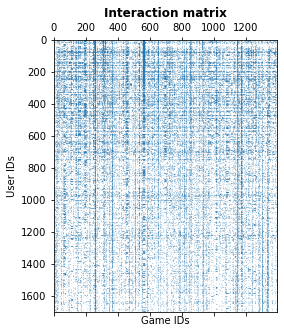

In [102]:
plt.figure(figsize = (5, 5))
plt.spy(adj, markersize=0.05)
plt.xlabel('Game IDs')
plt.ylabel('User IDs')
plt.title('Interaction matrix', fontweight = 'bold')
plt.savefig('interaction-matrix')
plt.show()

In [103]:
user_degrees = adj.sum(axis = 1)
print(user_degrees.shape)
game_degrees = adj.sum(axis = 0)
print(game_degrees.shape)

(1698,)
(1397,)


In [104]:
print('Max games by a user: ', user_degrees.max())
print('Min games by a user: ', user_degrees.min())
print('Avg games by a user: ', round(user_degrees.mean(), 1))

print('Most players for a game: ', game_degrees.max())
print('Least players for a game: ', game_degrees.min())
print('Avg players for a game: ', round(game_degrees.mean(), 1))

Max games by a user:  580
Min games by a user:  9
Avg games by a user:  49.7
Most players for a game:  930
Least players for a game:  7
Avg players for a game:  60.4


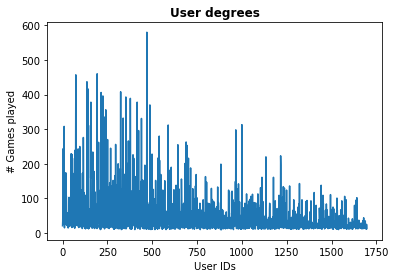

In [109]:
plt.plot(user_degrees)
plt.xlabel('User IDs')
plt.ylabel('# Games played')
plt.title('User degrees', fontweight = 'bold')
plt.savefig('user-degrees')
plt.show()

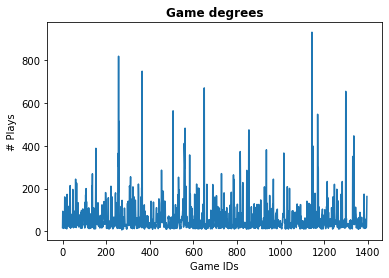

In [110]:
plt.plot(game_degrees)
plt.xlabel('Game IDs')
plt.ylabel('# Plays')
plt.title('Game degrees', fontweight = 'bold')
plt.savefig('game-degrees')
plt.show()